In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import re

In [2]:
quran_english = pd.read_csv('/kaggle/input/the-holy-quran-dataset/en.yusufali.csv')

quran_english

,Surah,Ayah,Text
0,1,1,"In the name of Allah, Most Gracious, Most Merc..."
1,1,2,"Praise be to Allah, the Cherisher and Sustaine..."
2,1,3,"Most Gracious, Most Merciful;"
3,1,4,Master of the Day of Judgment.
4,1,5,"Thee do we worship, and Thine aid we seek."
...,...,...,...
6231,114,2,"The King (or Ruler) of Mankind,"
6232,114,3,"The god (or judge) of Mankind,-"
6233,114,4,"From the mischief of the Whisperer (of Evil), ..."
6234,114,5,(The same) who whispers into the hearts of Man...


In [3]:
quran_english.shape

(6236, 3)

In [4]:
quran_english[quran_english['Text'].str.contains('In the name of Allah, Most Gracious, Most Merciful')]

,Surah,Ayah,Text
0,1,1,"In the name of Allah, Most Gracious, Most Merc..."
3188,27,30,"""It is from Solomon, and is (as follows): 'In ..."


**Checking the null values in the dataset**

In [5]:
quran_english.isna().sum()

Surah    0
Ayah     0
Text     0
dtype: int64

In [6]:
# Importing the surah names dataset file
surah_names = pd.read_csv('/kaggle/input/surah-namesholy-quran/surah_names_english.csv', names=['Surah', 'Surah Name'])

# Removing white space in the beginning of names
surah_names["Surah Name"] = surah_names["Surah Name"].str[1:]

surah_names

,Surah,Surah Name
0,1,Al-Fatihah (the Opening)
1,2,Al-Baqarah (the Cow)
2,3,Aali Imran (the Family of Imran)
3,4,An-Nisa’ (the Women)
4,5,Al-Ma’idah (the Table)
...,...,...
109,110,An-Nasr (the Help)
110,111,Al-Masad (the Palm Fiber)
111,112,Al-Ikhlas (the Sincerity)
112,113,Al-Falaq (the Daybreak)


In [7]:
# Merging surah names dataframe with quran dataframe on Surah no.
quran_english_with_surah = quran_english.merge(surah_names, on='Surah')
quran_english_with_surah.index = np.arange(1,6236+1)

quran_english_with_surah

,Surah,Ayah,Text,Surah Name
1,1,1,"In the name of Allah, Most Gracious, Most Merc...",Al-Fatihah (the Opening)
2,1,2,"Praise be to Allah, the Cherisher and Sustaine...",Al-Fatihah (the Opening)
3,1,3,"Most Gracious, Most Merciful;",Al-Fatihah (the Opening)
4,1,4,Master of the Day of Judgment.,Al-Fatihah (the Opening)
5,1,5,"Thee do we worship, and Thine aid we seek.",Al-Fatihah (the Opening)
...,...,...,...,...
6232,114,2,"The King (or Ruler) of Mankind,",An-Nas (Mankind)
6233,114,3,"The god (or judge) of Mankind,-",An-Nas (Mankind)
6234,114,4,"From the mischief of the Whisperer (of Evil), ...",An-Nas (Mankind)
6235,114,5,(The same) who whispers into the hearts of Man...,An-Nas (Mankind)


# Exploratory Data Analysis

**Numbers of verses in each chapter.**

In [8]:
quran_english_with_surah["Surah Name"].value_counts()

Surah Name
Al-Baqarah (the Cow)                   286
Ash-Shu’ara’ (the Poets)               227
Al-A’raf (the Heights)                 206
Aali Imran (the Family of Imran)       200
As-Saffah (Those Ranges in Ranks)      182
                                      ... 
Quraish (Quraish)                        4
Al-Ikhlas (the Sincerity)                4
Al-‘Asr (the Time)                       3
Al-Kauthar (the River of Abundance)      3
An-Nasr (the Help)                       3
Name: count, Length: 114, dtype: int64

**Splitting the dataset into 3 parts for full visible insights**

In [9]:
# Splitting quran dataset into 3 parts

# From Chapter 1 - 39
surah_1_39 = quran_english_with_surah[quran_english_with_surah['Surah'] < 40] 

# From Chapter 40 - 79
surah_40_79 = quran_english_with_surah[(quran_english_with_surah['Surah'] > 39) & (quran_english_with_surah['Surah'] < 80)]

# From Chapter 80 - 144
surah_80_114 = quran_english_with_surah[quran_english_with_surah['Surah'] > 79]

**Plotting all Surah with their verses count**

In [10]:
# Function for making and displaying a count plot
def quran_chapters_verses_countplot(dataframe, y_axis, title):
    # Setting figures size and theme
    plt.figure(figsize=(6,10))
    sns.set_style('darkgrid')

    # Countplot to count the number of verses of each chapter and plot
    ax = sns.countplot(data=dataframe, y=y_axis, palette='viridis')

    # Setting labels for each bar
    for container in ax.containers:
        ax.bar_label(container, size=10, padding=2)

    # Customizing plot
    ax.set_title(title, fontweight='bold', fontsize=12)
    ax.set_ylabel('Chapters (Surahs)', fontweight='bold')
    ax.set_xlabel('Verses', fontweight='bold')
    ax.set_xticks([0,50,100,150,200,250,300])
        
    plt.show()

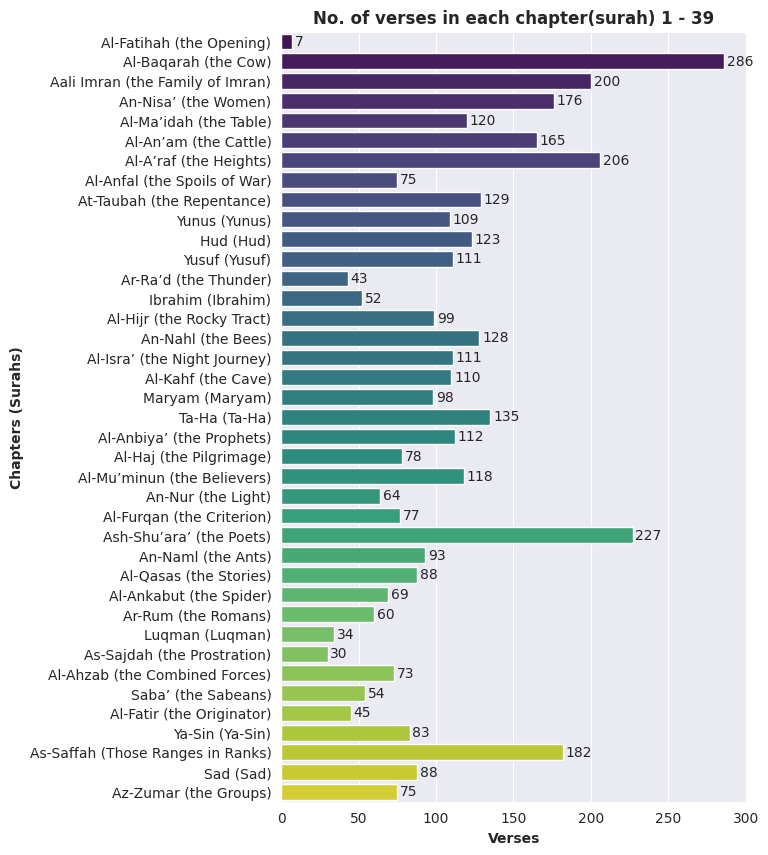

In [11]:
quran_chapters_verses_countplot(surah_1_39, 'Surah Name', 'No. of verses in each chapter(surah) 1 - 39')

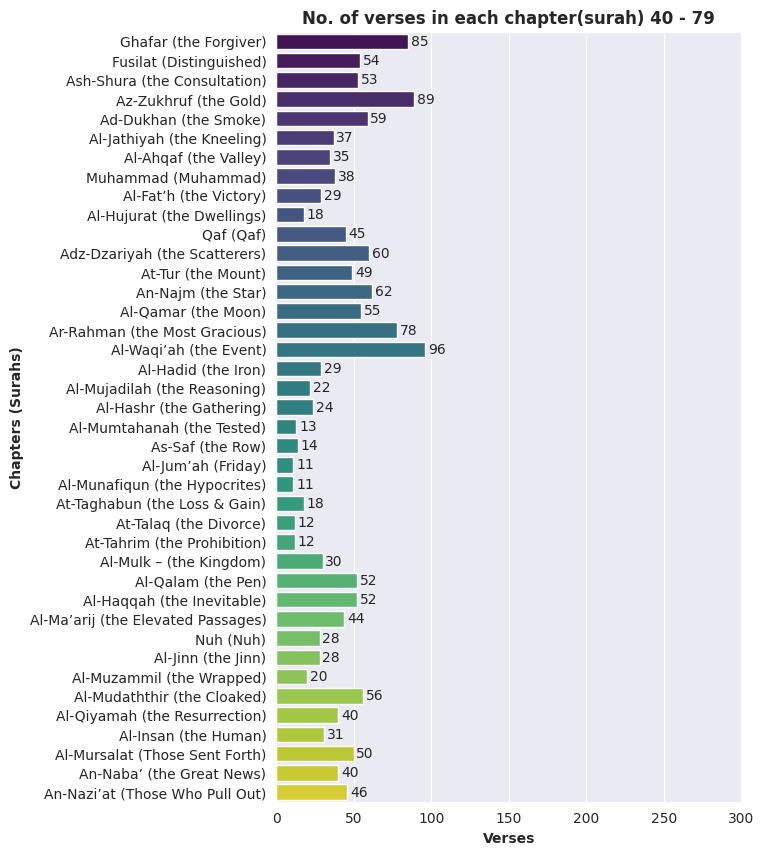

In [12]:
quran_chapters_verses_countplot(surah_40_79, 'Surah Name', 'No. of verses in each chapter(surah) 40 - 79')

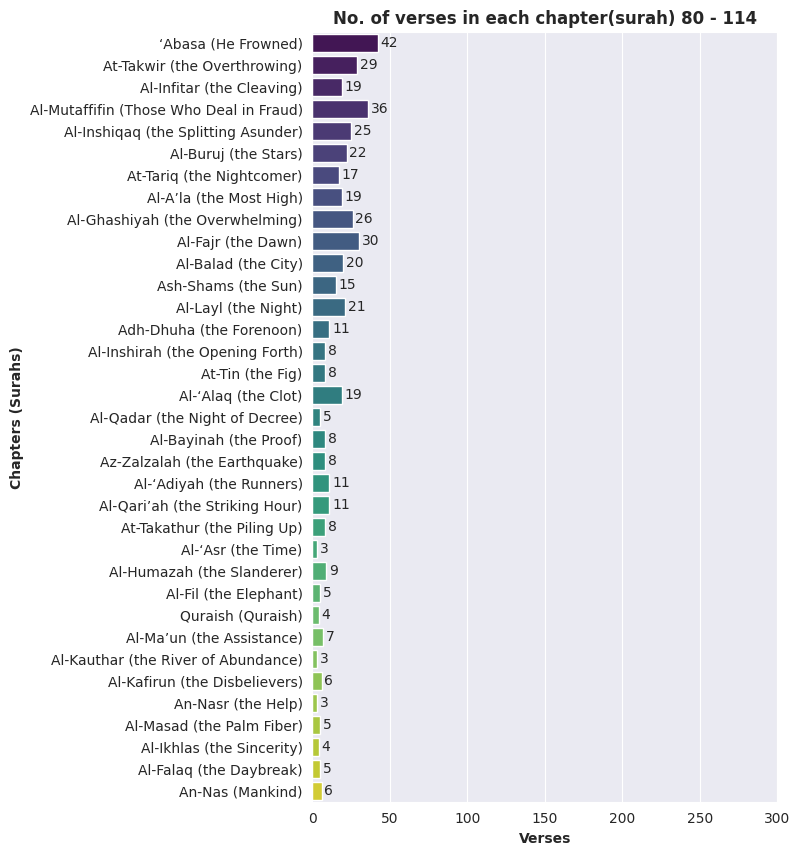

In [13]:
quran_chapters_verses_countplot(surah_80_114, 'Surah Name', 'No. of verses in each chapter(surah) 80 - 114')

# Prophets name's frequency

In [14]:
# List of all the prophets mentioned in the Quran
prophet_names = [ "Isma'il", 'Elisha', 'Zul-Kifl', 'Jesus', 'Moses', "Shu'aib", 'Jacob', 'Lut',
                 'Joseph', 'Isaac', 'Job', 'Aaron', 'Abraham', 'Noah', 'Adam', 'Hud', 'Solomon', 
                 'David', 'Zakariya', 'Yahya', 'Elias', 'Jonah', 'Idris', 'Salih', 'Muhammad']

# Making a empty dicitonary
prophet_names_freq = {}

# Initializing with all prophet names as key and 0 value(i.e count)
for prophet in prophet_names:
    prophet_names_freq[prophet.lower()] = 0
    
# Code for counting prophet names, start by looping in Quran dataframe
for lab,row in quran_english.iterrows():
    
    # Extract each verse and split the words and store in a list
    ayah_word_list = row['Text'].split(' ') 
    
    # Loop through verse list to access each word
    for word in ayah_word_list:
        # Lower casing the word and remove any special characters from it through RE
        word = word.lower()
        pattern = re.compile('[^a-zA-Z-\']') 
        word = pattern.sub('', word) 
        
        # If the word is present in prophet names dict then increase count value
        if word in prophet_names_freq:
            prophet_names_freq[word] += 1

# Making a dataframe with the prophets dictionary           
prophet_names_df = pd.DataFrame({ 'Name' : list(prophet_names_freq.keys()),
                                  'Frequency' : list(prophet_names_freq.values())})

prophet_names_df['Name'] = prophet_names_df['Name'].apply(str.capitalize)

prophet_names_df.sort_values('Frequency', ascending=False, inplace=True)

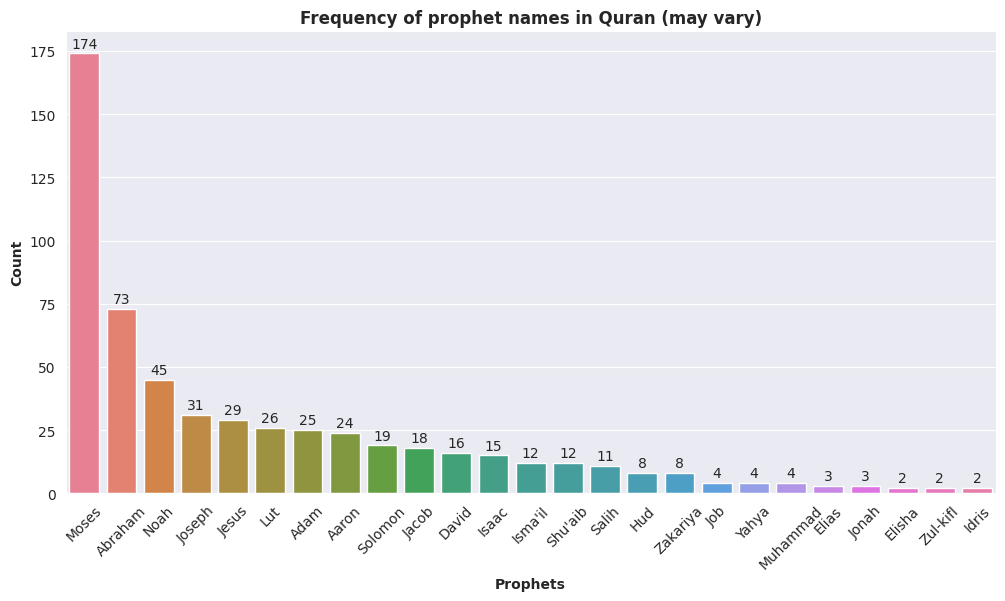

In [15]:
# Plotting the graph
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
ax = sns.barplot(data=prophet_names_df, x='Name', y='Frequency',palette='husl')

for container in ax.containers:
    ax.bar_label(container, size=10, padding=2)
    
ax.set_title("Frequency of prophet names in Quran (may vary)", fontweight='bold', fontsize=12)
ax.set_ylabel("Count", fontweight='bold')
ax.set_xlabel("Prophets", fontweight='bold')
ax.tick_params('x', rotation=45)
    
plt.show()

# Word cloud of Quran and different chapters.

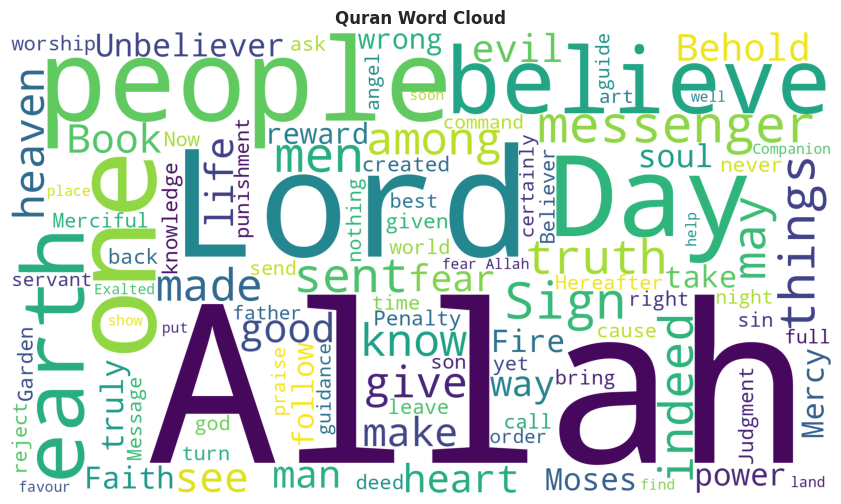

In [16]:
# Function for generating word cloud, it takes, a string, stopwords list, title for the image, maxwords to show
def word_cloud_generator(text_corpus, stopwords, title, maxwords):
    word_cloud = WordCloud( background_color='white', stopwords=stopwords, height=1080, width=1920, max_words=maxwords)
    word_cloud.generate(text_corpus)

    plt.figure(figsize=( 12,6))
    plt.imshow(word_cloud)
    plt.title(title, fontweight='bold', fontsize=12)
    plt.axis('off')
    plt.show()

# Collected some stopwords from the English Quran and updating it in STOPWORDS set
quranic_stop_words = ['ye', 'verily', 'will', 'said', 'say', 'us', 'thy', 'thee', 'O', 'except', 'Nay',
                      'thou' ,'hath', 'Thus', 'none', 'therein', 'come', 'came', 'even', 'two', 'word',
                      'every', 'let', 'thing', 'with', 'whose', 'forth', 'wouldst', 'set', 'unto']
stopwords = STOPWORDS.update(quranic_stop_words)

# Extracting each verse and storing them in a string
quran_text = ""
for lab,row in quran_english.iterrows():
    quran_text += row['Text']

word_cloud_generator(quran_text, stopwords, 'Quran Word Cloud', 100)

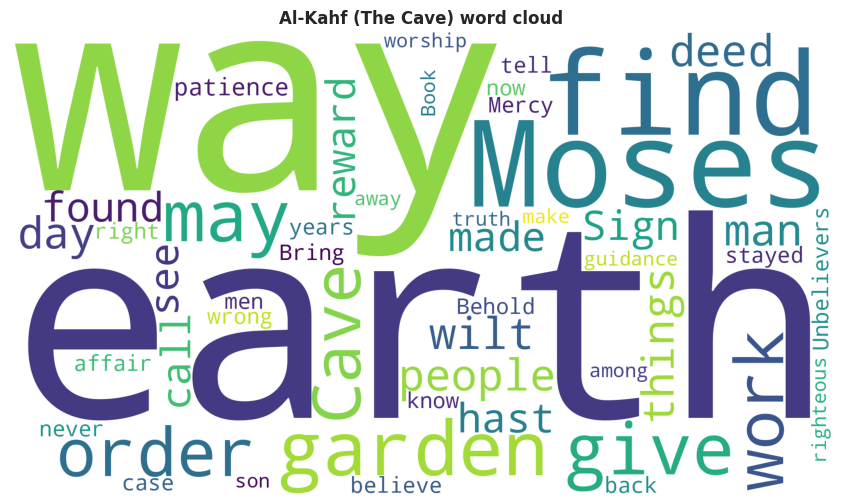

In [17]:
# Subsetting 18 Surah from the Quran dataframe
surah_kahf = quran_english_with_surah[quran_english_with_surah['Surah'] == 18]

# Concating each verse in a string
surah_kahf_text = ""
for lab,row in surah_kahf.iterrows():
    surah_kahf_text += row['Text']
    
stopwords2 = list(STOPWORDS) + ['Allah', 'Lord', 'one', 'best']
word_cloud_generator(surah_kahf_text, stopwords2, 'Al-Kahf (The Cave) word cloud', 50)

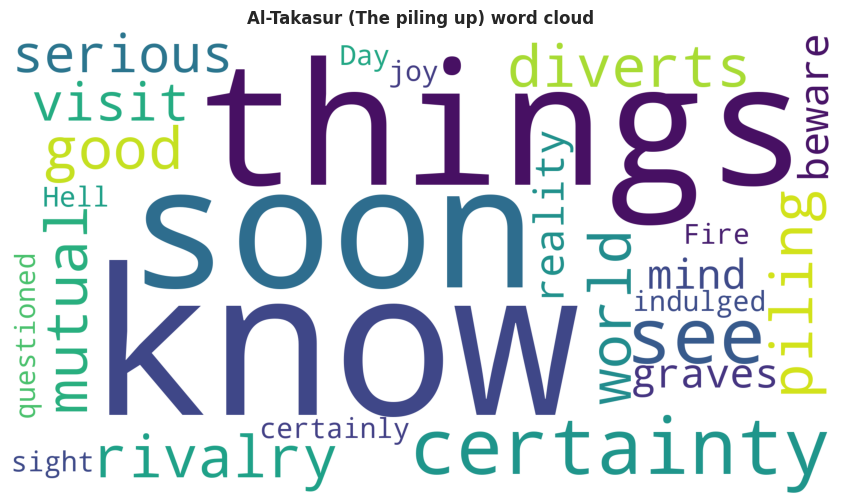

In [18]:
surah_takasur = quran_english_with_surah[quran_english_with_surah['Surah'] == 102]

surah_takasur_text = ""
for lab,row in surah_takasur.iterrows():
    surah_takasur_text += row['Text']
    
word_cloud_generator(surah_takasur_text, stopwords, 'Al-Takasur (The piling up) word cloud', 50)

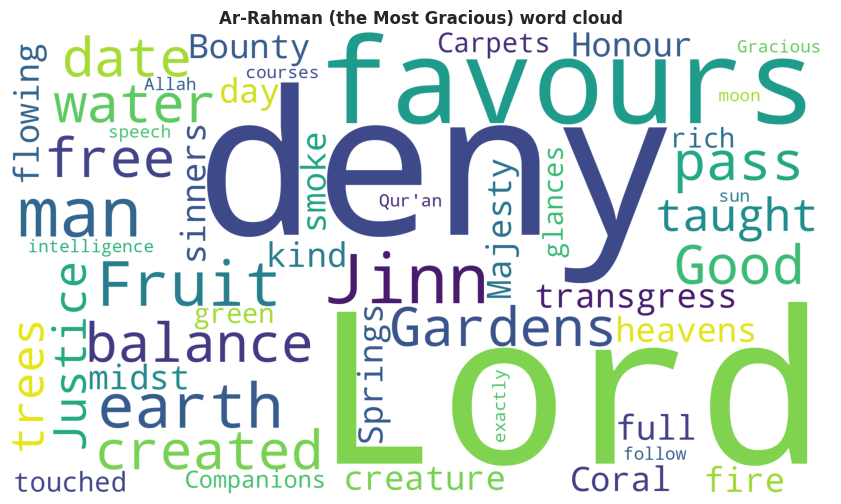

In [19]:
surah_rahman = quran_english_with_surah[quran_english_with_surah['Surah'] == 55]

surah_rahman_text = ""
for lab,row in surah_rahman.iterrows():
    surah_rahman_text += row['Text']
    
word_cloud_generator(surah_rahman_text, stopwords,'Ar-Rahman (the Most Gracious) word cloud', 50)

# Important things which Quran has emphasized more on.

In [20]:
# List of terms
terms_list = [ 'prayer', 'charity', 'justice', 'peace', 'patience', 'world', 'heaven', 'forgive', 'wisdom', 'hereafter']

# Making a dictionary of terms with value 0 initially
terms_list_freq = {}
for term in terms_list:
    terms_list_freq[term] = 0

# Code for counting the matched words and incrementing the count
for lab,row in quran_english.iterrows():
    ayat_word_list = row['Text'].split(' ')
    for word in ayat_word_list:
        word = word.lower()
        pattern = re.compile('[^a-zA-Z]') 
        word = pattern.sub('', word)
        for term in terms_list_freq:
            if word == term:
                terms_list_freq[word] += 1
            elif word.__contains__(term):
                terms_list_freq[term] += 1
# Make a dataframe from the dictionary
terms_df = pd.DataFrame({'Term' : terms_list_freq.keys(),
                         'Freq' : terms_list_freq.values()})

# Capitialize all term names
terms_df['Term'] = terms_df['Term'].apply(str.capitalize)

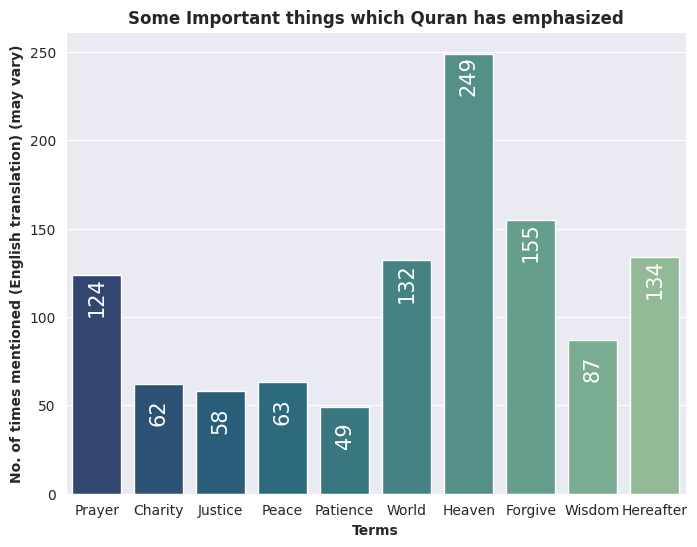

In [21]:
# Plotting the graph
plt.figure(figsize=(8,6))
sns.set_style('darkgrid')
ax = sns.barplot(data=terms_df, x='Term', y='Freq',palette='crest_r')

for container in ax.containers:
    ax.bar_label(container, size=15, padding=-30, color='white', rotation=90)
    
ax.set_title("Some Important things which Quran has emphasized", fontweight='bold', fontsize=12)
ax.set_ylabel("No. of times mentioned (English translation) (may vary)", fontweight='bold')
ax.set_xlabel("Terms", fontweight='bold')
    
plt.show()

In [22]:
terms_list = ['injustice', 'oppress', 'adultery', 'hell', 'satan', 'wrongdoing', 'resurrection', 'hypocrite', 'liar', 'greed']

terms_list_freq = {}

for term in terms_list:
    terms_list_freq[term] = 0
    
for lab,row in quran_english.iterrows():
    ayat_word_list = row['Text'].split(' ')
    for word in ayat_word_list:
        word = word.lower()
        pattern = re.compile('[^a-zA-Z]') 
        word = pattern.sub('', word)
        for term in terms_list_freq:
            if word == term:
                terms_list_freq[word] += 1
            elif word.__contains__(term):
                terms_list_freq[term] += 1

terms2_df = pd.DataFrame({'Term' : terms_list_freq.keys(),
                         'Freq' : terms_list_freq.values()})

terms2_df['Term'] = terms2_df['Term'].apply(str.capitalize)  

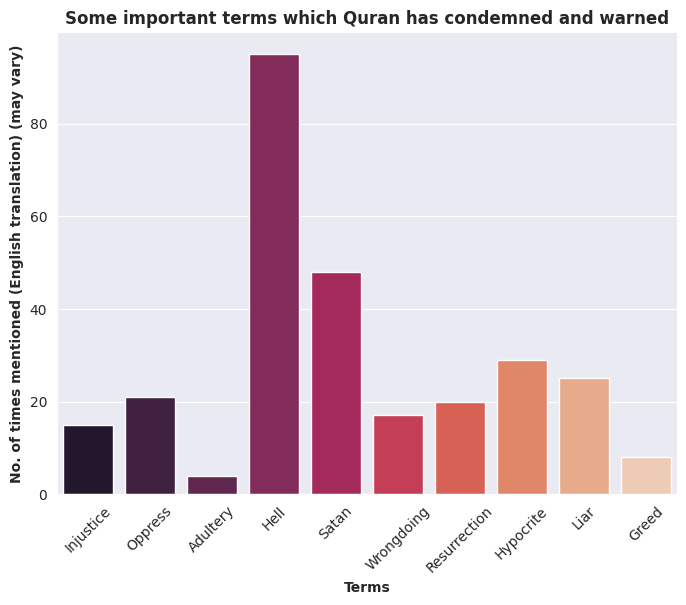

In [23]:
# Plotting the graph
plt.figure(figsize=(8,6))
sns.set_style('darkgrid')
ax = sns.barplot(data=terms2_df, x='Term', y='Freq',palette='rocket')
    
ax.set_title("Some important terms which Quran has condemned and warned", fontweight='bold', fontsize=12)
ax.set_ylabel("No. of times mentioned (English translation) (may vary)", fontweight='bold')
ax.set_xlabel("Terms", fontweight='bold')
ax.tick_params('x', rotation=45)
    
plt.show()